# EDA

In [ ]:
columns = ['id','label','text','subject','speaker','job title','state info','party','barely true','false','half true','mostly true','pants on fire','context']
label_map = {'pants-fire':-3, 'false':-2, 'barely-true':-1, 'half-true':1, 'mostly-true':2, 'true':3}

In [ ]:
train = pd.read_csv('liar/raw_data/liar/train.tsv',sep='\t',header=None, names=columns)
test =  pd.read_csv('liar/raw_data/liar/test.tsv',sep='\t',header=None, names=columns)
valid = pd.read_csv('liar/raw_data/liar/valid.tsv',sep='\t',header=None, names=columns)

In [ ]:
train.head()

,id,label,text,subject,speaker,job title,state info,party,barely true,false,half true,mostly true,pants on fire,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [ ]:
train.shape,test.shape,valid.shape

((10240, 14), (1267, 14), (1284, 14))

In [ ]:
data = pd.concat([train,test,valid])
data = data.drop(columns=['id'])
data.head()

,label,text,subject,speaker,job title,state info,party,barely true,false,half true,mostly true,pants on fire,context
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


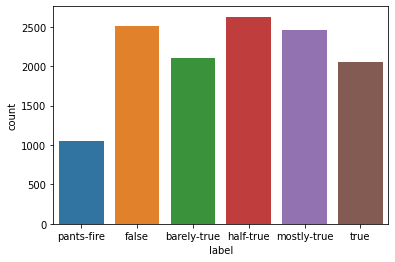

In [ ]:
sns.countplot(data['label'],order=['pants-fire','false','barely-true','half-true','mostly-true','true'])

In [ ]:
arr = data[data['job title']=='President']['label'].value_counts()
print(pd.DataFrame(arr))

             label
half-true      166
mostly-true    164
true           124
false           82
barely-true     70
pants-fire       9


In [ ]:
data['state info'].value_counts()[:10]

Texas           1260
Florida         1231
Wisconsin        900
New York         829
Illinois         692
Ohio             586
Georgia          545
Virginia         512
Rhode Island     452
Oregon           307
Name: state info, dtype: int64

In [ ]:
earr = data[data['label']=='pants-fire']['speaker'].value_counts()
print(pd.DataFrame(arr)[:5])

                speaker
chain-email         105
donald-trump         61
blog-posting         44
facebook-posts       36
mitt-romney          19


In [ ]:
arr = data[data['label']=='pants-fire']['subject'].value_counts()
print(pd.DataFrame(arr)[:5])

                      subject
health-care                43
elections                  35
candidates-biography       32
immigration                29
taxes                      25


In [ ]:
arr = data[data['label']=='true']['speaker'].value_counts()
print(pd.DataFrame(arr)[:5])

                 speaker
barack-obama         123
hillary-clinton       73
john-mccain           39
mitt-romney           33
rick-perry            26


In [ ]:
arr = data[data['label']=='true']['subject'].value_counts()
print(pd.DataFrame(arr)[:5])

                      subject
elections                  71
health-care                65
taxes                      59
education                  56
candidates-biography       49


In [ ]:
data['subject'].value_counts()[:5]

health-care    474
taxes          356
education      309
elections      304
immigration    303
Name: subject, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


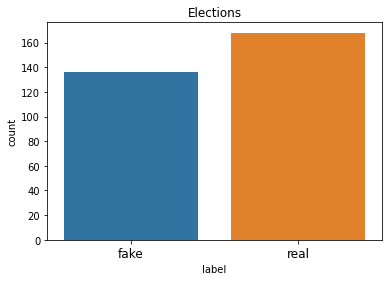

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


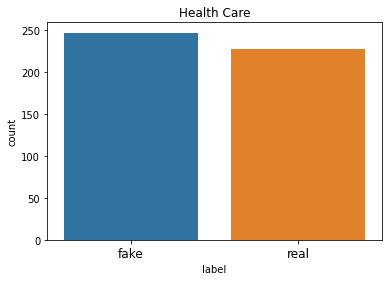

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


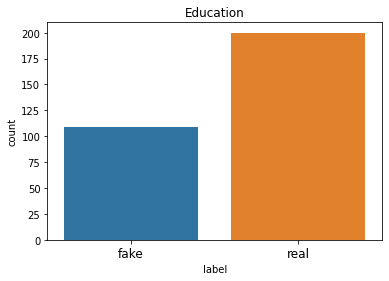

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


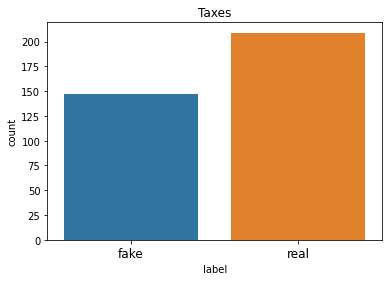

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


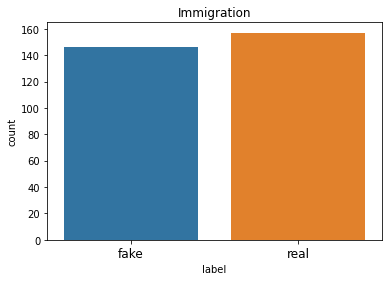

In [ ]:
data['label'] = data['label'].map(label_map)
data = data.reset_index().drop(columns=['index'])
data['label'] =[(1 if data['label'][i]>0 else 0) for i in range(len(data))]
arr = data[data['subject']=='elections']['label']
fig = sns.countplot(arr)
fig.set_xticklabels(['fake','real'],fontsize=12)
plt.title('Elections',fontsize=12)
plt.show()

arr = data[data['subject']=='health-care']['label']
fig = sns.countplot(arr)
fig.set_xticklabels(['fake','real'],fontsize=12)
plt.title('Health Care',fontsize=12)
plt.show()

arr = data[data['subject']=='education']['label']
fig = sns.countplot(arr)
fig.set_xticklabels(['fake','real'],fontsize=12)
plt.title('Education',fontsize=12)
plt.show()

arr = data[data['subject']=='taxes']['label']
fig = sns.countplot(arr)
fig.set_xticklabels(['fake','real'],fontsize=12)
plt.title('Taxes',fontsize=12)
plt.show()


arr = data[data['subject']=='immigration']['label']
fig = sns.countplot(arr)
fig.set_xticklabels(['fake','real'],fontsize=12)
plt.title('Immigration',fontsize=12)
plt.show()

In [ ]:
arr = data['party'].value_counts()
print(pd.DataFrame(arr)[:5])

              party
republican     5665
democrat       4137
none           2181
organization    264
independent     180


In [ ]:
data[data['party']=='republican']['subject'].value_counts()[:5]

health-care    232
taxes          193
immigration    186
education      133
elections      131
Name: subject, dtype: int64

In [ ]:
data[data['party']=='democrat']['subject'].value_counts()[:5]

health-care    171
taxes          107
education      104
elections      104
economy         79
Name: subject, dtype: int64